In [1]:

import matplotlib.pyplot as plt
import pickle
import numpy as np
import sys
import os
import pandas as pd
import seaborn as sns
import matplotlib.colors as colors
import matplotlib.cm as cmx

# load data

In [2]:


# filepath = sys.argv[1]
stim_type = 'smooth'
# param = sys.argv[3]
# val = sys.argv[4]
# par = f'{param}_{val}'

net = 'Reciporcal_mono_linear_heavy_maxan_equalweight/noGCGainControl'

# load dataframe 
response_data = pd.read_csv(f'/user/sebert/home/Documents/Simulations/motion/anticipation_1D/Reciporcal/{net}/responses_RG_nAB_wBAfixed_long.csv')


# load dataframe 
df = pd.read_csv(f'/user/sebert/home/Documents/Simulations/motion/anticipation_1D/Reciporcal/{net}/anticipation_data_nAB_wBAfixed_long.csv')


print(df.columns)

# calculate anticipation with respect to V_drive
df['ant_RG_drive_time']  =  df['peak_drive'] - df['peak_RG'] 
df['ant_RG_drive_space'] = df['ant_RG_drive_time']* df['speed']

# calculate anticipation with respect to 
df['ant_RG_bar_time']  = df['tp_rf_GC_mid'] - df['peak_RG'] 
df['ant_RG_bar_space'] = df['ant_RG_bar_time']* df['speed']

df['taunAr']= df['taunA'].round(3)
df['taunBr']= df['taunB'].round(3)
# multiple heatmaps, keeping w+ fixed and changing w-
#dfgrouped = df.groupby(['wAB'])


speeds = df['speed'].unique()#[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,2.0]





Index(['Unnamed: 0', 'wBA', 'wAB', 'tauA', 'tauB', 'speed', 'peak_RG',
       'peak_RB', 'peak_drive', 'tp_rf_GC_mid', 'peak_RG_pooling',
       'peak_RB_pooling', 'onset_RB', 'onset_RG', 'betaA', 'betaB', 'krecA',
       'krecB', 'krelA', 'krelB', 'neqA', 'neqB', 'nminA', 'nminB',
       'onset_RB_pooling', 'onset_RG_pooling', 'taunA', 'taunB'],
      dtype='object')


In [3]:
df.query('betaA ==0.03')['taunAr']
df.query('betaB ==0.6')['taunBr']

5       0.769
14      0.769
24      0.769
33      0.769
43      0.769
        ...  
3567    0.769
3577    0.769
3586    0.769
3596    0.769
3605    0.769
Name: taunBr, Length: 380, dtype: float64

In [4]:
fontsize_legend = 20
fontsize_labels = 25
fontsize_panellabel = 30
fontsize_ticks = 20
lw = 4
ms = 60

figsize_ratio = 3
figsize = (16,16)

save = True
save_name = "Figure 1"
show = True
image_format = "png"
dpi = 300
panellabel_position = [-0.08, .85]


Text(721.8235294117648, 0.5, '')

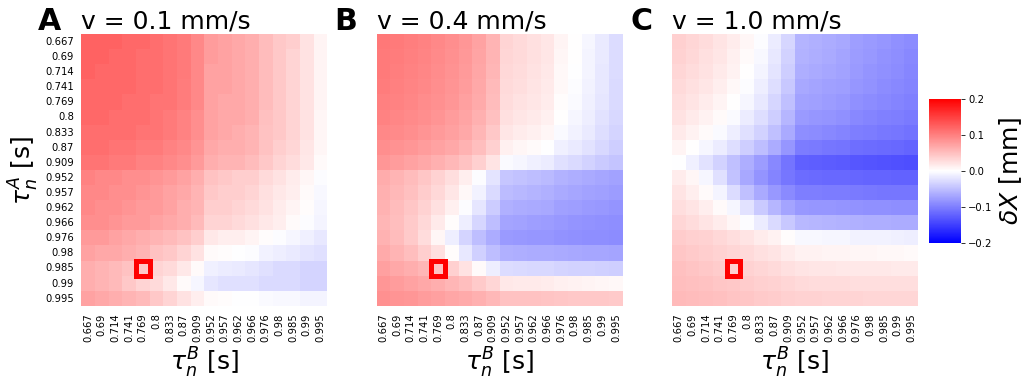

In [6]:
var = 'ant_RG_bar_space'
fig = plt.figure(figsize = (15,5))
#fig.suptitle(f'{var}')

cbar_ax = fig.add_axes([.91, .3, .03, .4])
cbar_ax.set_ylabel(r'$\delta A$ [mm]', fontsize = fontsize_labels)
s = 0.1
ax = fig.add_subplot(131)
ax.text(panellabel_position[0]-0.0,panellabel_position[1]+0.25, "A", transform=ax.transAxes,
       fontsize=fontsize_panellabel, fontweight='bold', va='top', ha='right')
ax.set_title(f'v = {s} mm/s', fontsize = fontsize_labels, loc = 'left')

dfg = df.groupby('speed')
dfs = dfg.get_group(s)

# plot heatmap for beta
g_heatmap = dfs.pivot_table(index = 'taunAr',columns = 'taunBr',values = var, aggfunc = 'mean')
sns.heatmap(g_heatmap, cmap = 'bwr', ax = ax,  vmin=-.2, vmax=.2, cbar=None)

t = g_heatmap.columns == 0.769
col = t.nonzero()[0][0]

t = g_heatmap.index == 0.985
ind = t.nonzero()[0][0]
ax.add_patch(plt.Rectangle((col, ind), 1, 1, fc='none', ec='red', lw=5, clip_on=False))

ax.tick_params(left=False, bottom=False)

ax.set_ylabel(r'$\tau_{n}^{A}$ [s]', fontsize = fontsize_labels)
ax.set_xlabel(r'$\tau_{n}^{B}$ [s]', fontsize = fontsize_labels)

s = 0.4
ax = fig.add_subplot(132)
ax.text(panellabel_position[0]-0.0,panellabel_position[1]+0.25, "B", transform=ax.transAxes,
       fontsize=fontsize_panellabel, fontweight='bold', va='top', ha='right')
ax.set_title(f'v = {s} mm/s', fontsize = fontsize_labels, loc = 'left')
dfs = dfg.get_group(s)
# plot heatmap for beta
g_heatmap = dfs.pivot_table(index = 'taunAr',columns = 'taunBr',values = var, aggfunc = 'mean')
sns.heatmap(g_heatmap, cmap = 'bwr', ax = ax,  vmin=-.2, vmax=.2, cbar=None, yticklabels=False)

t = g_heatmap.columns == 0.769

t = g_heatmap.index == 0.985
ind = t.nonzero()[0][0]
ax.add_patch(plt.Rectangle((col, ind), 1, 1, fc='none', ec='red', lw=5, clip_on=False))

ax.tick_params(left=False, bottom=False)
ax.set_ylabel('')
ax.set_xlabel(r'$\tau_{n}^{B}$ [s]', fontsize = fontsize_labels)



s = 1.0
ax = fig.add_subplot(133)
ax.text(panellabel_position[0]-0.0,panellabel_position[1]+0.25, "C", transform=ax.transAxes,
       fontsize=fontsize_panellabel, fontweight='bold', va='top', ha='right')
ax.set_title(f'v = {s} mm/s', fontsize = fontsize_labels, loc = 'left')
dfs = dfg.get_group(s)

# plot heatmap for beta
g_heatmap = dfs.pivot_table(index = 'taunAr',columns = 'taunBr',values = var, aggfunc = 'mean')
sns.heatmap(g_heatmap, cmap = 'bwr', ax = ax,  vmin=-.2, vmax=.2, yticklabels=False, cbar_ax=cbar_ax, cbar_kws={'label' :r'$\delta X$ [mm]'})
t = g_heatmap.columns == 0.769
col = t.nonzero()[0][0]

t = g_heatmap.index == 0.985
ind = t.nonzero()[0][0]
ax.add_patch(plt.Rectangle((col, ind), 1, 1, fc='none', ec='red', lw=5, clip_on=False))


ax.set_xlabel(r'$\tau_{n}^{B}$ [s]', fontsize = fontsize_labels)

ax.tick_params(left=False, bottom=False)
ax.set_ylabel('')
